## Intro to NLP Tasks

### Table of Contents
This document outlines key Natural Language Processing (NLP) tasks, providing a foundational understanding for beginners. Each section delves into different aspects of NLP, offering insights into how machines understand human language.
- [**Information Extraction**](###Information-Extraction): The process of automatically extracting structured information from unstructured and/or semi-structured machine-readable documents. In most of the cases this activity concerns processing human language texts by means of natural language processing (NLP). We will see Entity Extraction , POS tagging examples in this section. 

- [**Classification**](###Classification): A task that consists in identifying the category or class to which a new observation belongs, on the basis of a training set of data containing observations whose category membership is known.

- [**Sequence to Sequence**](###Sequence-to-Sequence-Tasks): A family of models where the input is a sequence of tokens, and the output is also a sequence of tokens. This model is used in various NLP tasks like machine translation, text summarization, etc.


### Information Extraction

Information Extraction (IE) tasks involve extracting structured information from unstructured text. Key IE tasks include Named Entity Recognition (NER) and Part of Speech (PoS) tagging among others.

- **Named Entity Recognition (NER)**: Identifies entities in text such as names of people, organizations, locations, etc. 
- **Part of Speech (PoS) Tagging**: Assigns part of speech to each word in a sentence, such as noun, verb, adjective, etc.

**Evaluation**: Precision, Recall, and F1 Score are commonly used metrics.<br>

**Sample Output**: For a sentence "Apple was founded by Steve Jobs in California," NER would identify "Apple" as an organization, "Steve Jobs" as a person, and "California" as a location.

#### Named Entity Recognition (NER) and Noun Phrase Extraction with spaCy

NER (Named Entity Recognition) is the process of identifying and classifying key information (entities) in text into predefined categories such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc. For example, in the sentence "Apple was founded by Steve Jobs in California," NER would identify "Apple" as an organization, "Steve Jobs" as a person, and "California" as a location.


Noun Phrase Extraction involves identifying and extracting phrases that consist of a noun and any words modifying the noun. It's useful for quickly understanding what a piece of text is about. In the same sentence, "Apple" and "Steve Jobs" would be extracted as noun phrases, highlighting the main subjects of the text.

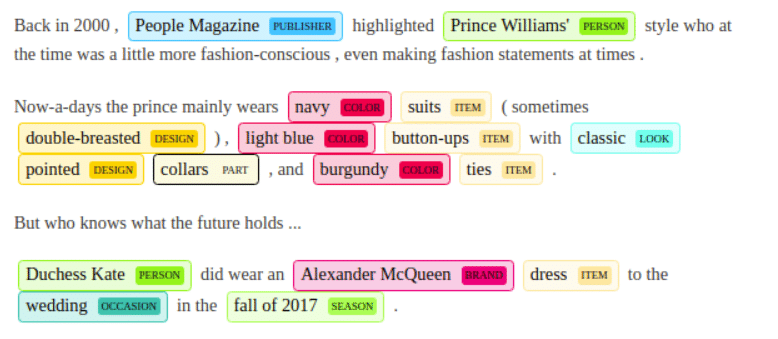

In [2]:
import spacy  # spaCy is an open-source software library for advanced natural language processing, used for tasks like tokenization, named entity recognition, and part of speech tagging.
from spacy import displacy  # displaCy is a visualization tool from spaCy to visually render linguistic annotations in a browser or Jupyter notebook.
from spacy.tokens import Span  # Span objects in spaCy represent slices of a document for entity and phrase matching. They are sequences of tokens that can have annotations.
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Sample text with more entities
text = "Microsoft, headquartered in Redmond, Washington, was founded by Bill Gates and Paul Allen on April 4, 1975. Apple, whose CEO is Tim Cook, competes in the same industry."

# Process the text with spaCy
doc = nlp(text)
# Noun Phrase Extraction
noun_phrases_spans = [Span(doc, np.start, np.end, label="NOUN_PHRASE") for np in doc.noun_chunks]
doc.spans["sc"] = noun_phrases_spans
print("Named Entity Recognition\n")
displacy.render(doc, style="ent",jupyter=True)
print("Noun Phrase Extraction\n")
displacy.render(doc, style="span", jupyter=True, options={"colors": {"NOUN_PHRASE": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}})


Named Entity Recognition



Noun Phrase Extraction



In [3]:
# If you want to see the explanation of the entity type
spacy.explain("GPE")

'Countries, cities, states'

### Classification

Classification tasks involve categorizing text into predefined categories. 

**Evaluation**: Accuracy, Precision, Recall, and F1 Score.

**Sample Output**: Predicting the category of a news article as "Sports," "Politics," etc.

Dataset : [SIB-200](https://huggingface.co/datasets/mteb/sib200) is the largest publicly available topic classification dataset based on Flores-200 covering 205 languages and dialects. 

**The Data Preprocessing** is done based on a TF-IDF Vectorization process which considers importance and occurance of each word in a given set of document. This esssentialy converts words -> Vectors. Algorithm is quite easy to understand , read [this](https://www.learndatasci.com/glossary/tf-idf-term-frequency-inverse-document-frequency/#:~:text=Using%20scikit%2Dlearn-,What%20is%20TF%2DIDF%3F,%2C%20relative%20to%20a%20corpus) reference to get an understanding of this algorithm. 

**Decision Trees**:  A decision tree is a hierarchical model used in decision support that depicts decisions and their potential outcomes, incorporating chance events. Follow [this](https://github.com/RheagalFire/Scratch-Implementations/blob/master/Decision%20Trees.ipynb) Code First Approach to understand Decision Trees. 

**Random Forest Classification** : Supervised Machine Learning Algorithm.They are Ensemble that works by combining multiple decision trees. Read about how [random forests really works](https://www.kaggle.com/code/jhoward/how-random-forests-really-work/)

**Gradient Boosting Classification** : Tree Based Ensemble Learning Algorithm. Read a Walkthrough [here](https://www.kaggle.com/code/yasinnsariyildiz/gradient-boosting-machines-tutorial)



#### Short Intro To Classification Metrics

Classification metrics are essential for evaluating the performance of machine learning models that predict categorical outcomes. These metrics provide insights into how well a model can distinguish between different classes. Here are some of the most commonly used classification metrics:

- **Accuracy**: The proportion of true results (both true positives and true negatives) among the total number of cases examined. It's a good measure when the class distributions are similar but can be misleading when class imbalances exist.

- **Precision**: The ratio of true positive predictions to the total positive predictions. It indicates the quality of the positive class predictions and is crucial when the cost of false positives is high.

- **Recall (Sensitivity)**: The ratio of true positive predictions to the actual number of positive instances. It measures the model's ability to capture positive instances, important when the cost of false negatives is high.

- **F1 Score**: The harmonic mean of precision and recall, providing a balance between them. It's useful when you need to take both false positives and false negatives into account.

- **ROC-AUC**: The Receiver Operating Characteristic curve plots the true positive rate against the false positive rate at various threshold settings. The Area Under the Curve (AUC) represents the model's ability to discriminate between positive and negative classes. A higher AUC indicates a better model.

- **Confusion Matrix**: A table that visualizes the performance of an algorithm, showing the actual versus predicted classifications. It helps identify the types of errors made by the classifier.

Understanding these metrics is crucial for interpreting model performance and making informed decisions on model selection and optimization for classification tasks.

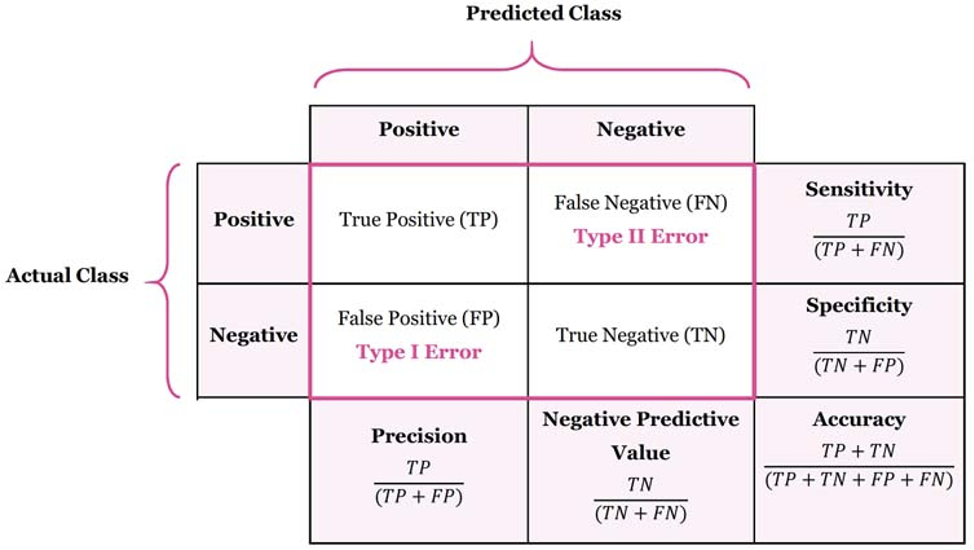

In [4]:
from datasets import load_dataset
import numpy as np
from tabulate import tabulate
# Load the dataset
data = load_dataset("mteb/sib200","eng_Latn")

# Extract texts and labels
texts = np.array([item['text'] for item in data['train']])
labels = np.array([item['category'] for item in data['train']])
unique_labels = sorted(list(set(labels)))
# Prepare data for tabulation based on new dataset structure
samples = []
for i in range(5):  # Display first 5 samples
    text_sample = texts[i][:100].replace('\n', ' ')  # Use the first 100 characters of the text, replacing newlines
    category_name = labels[i]  # Directly use the label as the category name
    samples.append((f"Sample {i+1}", text_sample, category_name))  # Append sample info

# Pretty print using tabulate
print(tabulate(samples, headers=["Sample Number", "Text", "Category"], tablefmt="grid"))

/Users/abcom/.pyenv/versions/3.11.0/envs/learn-ai/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Resolving data files: 100%|██████████| 205/205 [00:00<00:00, 702477.39it/s]


+-----------------+------------------------------------------------------------------------------------------------------+--------------------+
| Sample Number   | Text                                                                                                 | Category           |
+=================+======================================================================================================+====================+
| Sample 1        | Turkey is encircled by seas on three sides: the Aegean Sea to the west, the Black Sea to the north a | geography          |
+-----------------+------------------------------------------------------------------------------------------------------+--------------------+
| Sample 2        | In the beginning of the war they mostly travelled on top of the sea, but as radar began developing a | science/technology |
+-----------------+------------------------------------------------------------------------------------------------------+--------------

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(texts)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)

print_seperator = "-"*80 + "\n"

# RandomForest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Classification Report for Random Forest Classifier:\n")
print(print_seperator)
print(classification_report(y_test, y_pred_rf, target_names=unique_labels))
print(print_seperator)
# XGBoost Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred_xgb = gb_clf.predict(X_test)
print("Classification Report for GBoost Classifier:\n")
print(print_seperator)
print(classification_report(y_test, y_pred_xgb, target_names=unique_labels))
print(print_seperator)

Classification Report for Random Forest Classifier:

--------------------------------------------------------------------------------

                    precision    recall  f1-score   support

     entertainment       1.00      0.38      0.55         8
         geography       1.00      0.09      0.17        11
            health       0.57      0.27      0.36        15
          politics       0.45      0.22      0.29        23
science/technology       0.36      0.80      0.50        41
            sports       0.50      0.24      0.32        17
            travel       0.53      0.38      0.44        26

          accuracy                           0.43       141
         macro avg       0.63      0.34      0.38       141
      weighted avg       0.53      0.43      0.40       141

--------------------------------------------------------------------------------

Classification Report for GBoost Classifier:

--------------------------------------------------------------------------

### Limitations of Classical NLP Pipelines


Old NLP pipelines often involved stemming, stop word removal, and bag of words models.

- `Stemming`, for example, reduces words to their root forms, which can lead to a loss of meaningful differentiation between words with similar roots but different nuances in usage. For instance, "economy" and "economical" might be stemmed to the same root, "econom," stripping away important contextual information that distinguishes their actual meanings.

- `Stop word removal`, another common step in traditional NLP pipelines, involves eliminating common words (such as "the", "is", "at") from the text before processing. While this can reduce the dataset size and speed up computations, it also removes potentially significant context that could alter the meaning of a sentence. For example, the removal of stop words from "the bank of the river" and "the bank of America" could lead to confusion between two distinctly different types of "banks."

- `Bag of words` models, which transform text into fixed-length vectors by counting how many times each word appears, ignore the order in which words occur. This means that the sentences "John loves Mary" and "Mary loves John" would be considered identical in a bag of words representation, despite their different meanings due to the change in word order.

- `Word Embeddings` models , revolutionized NLP by providing a way to capture semantic relationships between words in a continuous vector space , however the static representatios for each word would mean that words with multiple meanings (homonyms) are represented by the same vector.They  capture semantic relationships based on the co-occurrence of words within a corpus but lack the ability to understand the context in which a word is used. 

These traditional techniques, while useful in many contexts, often fail to capture the complexity and subtlety of human language. They can lose important information and context, which modern techniques embeddings computation based on Attention Mechnisims in transformers are designed to preserve.Word embeddings capture semantic relationships between words by representing them in a continuous vector space, allowing for the capture of nuances in meaning that stem from word usage in different contexts. Transformers, with their ability to handle sequences of data and capture long-range dependencies between words, represent a significant advancement over older models by maintaining a richer sense of context and the subtleties of language.

In summary, while traditional NLP techniques laid the groundwork for the field, advancements in machine learning and computational power have led to the development of more sophisticated models that better understand and generate human language. These modern approaches offer significant improvements in accuracy, context preservation, and the ability to capture the nuances of language, making them more suitable for a wide range of NLP tasks in today's complex and information-rich environments.

### Using Contextual Embeddings to Train the Model
These embeddings consider the context of words, providing richer semantic information than traditional static embeddings. We are going to use Openai Embeddings for this purpose.

In [17]:
#openai embeddings 
# Using OpenAI's embeddings function to transform text data into embeddings
import openai
from dotenv import load_dotenv
import os 
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor
load_dotenv()
openai.api_key = os.getenv("OPENAI_API_KEY")
openai_client = openai.OpenAI()

def create_embedding(text):
    return openai_client.embeddings.create(input=[text], model="text-embedding-3-small", dimensions=1536).data[0].embedding

# Example usage: Transforming all the text data into embeddings with progress display
# Using ThreadPoolExecutor to run the embedding creation in parallel
with ThreadPoolExecutor(max_workers=8) as executor:
    X_embeddings = list(tqdm(executor.map(create_embedding, texts), total=len(texts)))


  0%|          | 0/701 [00:00<?, ?it/s]

100%|██████████| 701/701 [00:38<00:00, 18.28it/s]


In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, labels, test_size=0.2, random_state=42)

print_seperator = "-"*80 + "\n"

# RandomForest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Classification Report for Random Forest Classifier:\n")
print(print_seperator)
print(classification_report(y_test, y_pred_rf, target_names=unique_labels))
print(print_seperator)
# XGBoost Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred_xgb = gb_clf.predict(X_test)
print("Classification Report for GBoost Classifier:\n")
print(print_seperator)
print(classification_report(y_test, y_pred_xgb, target_names=unique_labels))
print(print_seperator)


Classification Report for Random Forest Classifier:

--------------------------------------------------------------------------------

                    precision    recall  f1-score   support

     entertainment       0.67      0.25      0.36         8
         geography       1.00      0.18      0.31        11
            health       0.91      0.67      0.77        15
          politics       0.82      0.78      0.80        23
science/technology       0.69      0.90      0.78        41
            sports       0.83      0.59      0.69        17
            travel       0.59      0.85      0.70        26

          accuracy                           0.72       141
         macro avg       0.79      0.60      0.63       141
      weighted avg       0.76      0.72      0.70       141

--------------------------------------------------------------------------------

Classification Report for GBoost Classifier:

--------------------------------------------------------------------------

### Over-fitting and Data Leaks

**Over-fitting** is a common issue in machine learning where a model learns the details and noise in the training data to the extent that it negatively impacts the model's performance on new, unseen data. This happens because the model becomes too complex, capturing noise and outliers in the training data as if they were significant patterns. As a result, the model performs well on the training data but poorly on any new data, because it has essentially memorized the training data rather than learning the underlying patterns.

**Overfitting** can occur for several reasons:
1. **Too complex of a model**: A model with too many parameters may fit the training data too closely.
2. **Insufficient training data**: With too little data, the model may not be able to learn the underlying patterns effectively and instead learns from the noise.
3. **Not enough regularization**: Regularization techniques, such as L1 and L2 regularization, help to prevent the model from becoming too complex by penalizing large coefficients. Without regularization, a model may become overly complex.
4. **Training for too long**: Training a model for too many epochs can lead to overfitting, as the model starts to memorize the training data rather than learning to generalize from it.

To avoid overfitting, data scientists use techniques such as cross-validation, where the training data is split into several mini-train-test sets to ensure the model performs well on unseen data. Regularization techniques and pruning (for decision trees) can also help reduce overfitting by simplifying the model or penalizing complexity. Additionally, gathering more data or using data augmentation techniques can help the model learn more general patterns rather than memorizing the training data.

**Data Leaks** are another critical issue that can lead to misleadingly high performance during training. A data leak occurs when information from the test set is inadvertently used during the training process. This can happen if the data preprocessing steps include information from the test set or if the model has access to data it wouldn't have in a real-world scenario. Data leaks give the model an unfair advantage, as it 'learns' from data it's supposed to be tested on, leading to overly optimistic performance estimates that do not hold up in real-world applications.Common Mistakes include  applying Imputation strategies before splitting the data for train and test set

# 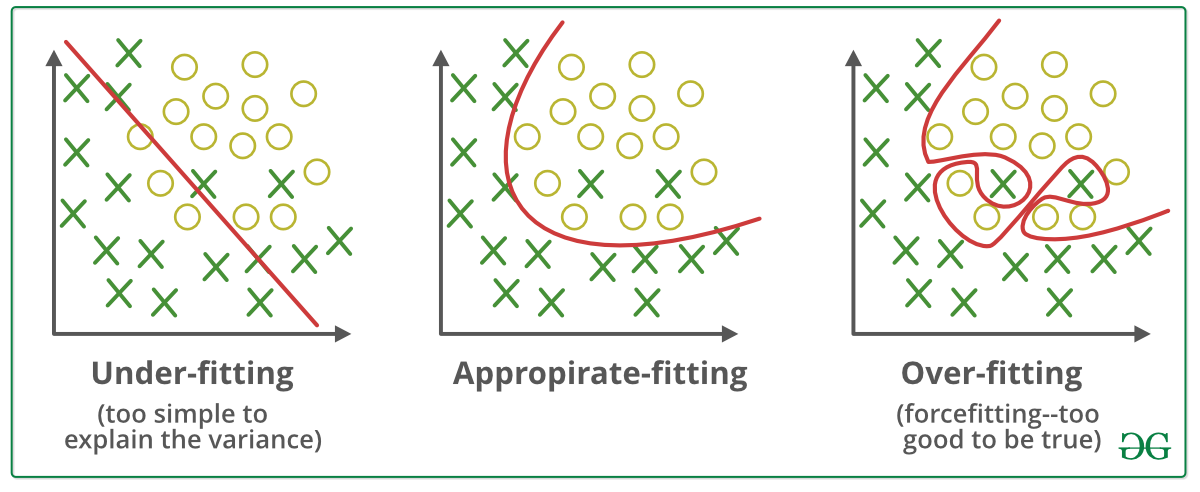
Image source: Geeks For Geeks



### k-Fold Stratified Cross Validation

In Stratified K-fold cross-validation, the dataset is split into "K" folds, and each fold is made by preserving the percentage of samples for each class. This means that each fold is a good representative of the whole dataset in terms of class distribution. Like standard K-fold, in each iteration, one fold is used as the test set and the remaining K-1 folds as the training set. This process is repeated K times, with each fold serving as the test set exactly once.

This technique helps reduce overfitting by ensuring that the model is tested on different subsets of the data, preventing it from learning noise and specific patterns present in a single train-test split.It helps in developing models that generalize better to new, unseen data, especially in cases where class imbalance could bias the model's performance if not properly addressed.


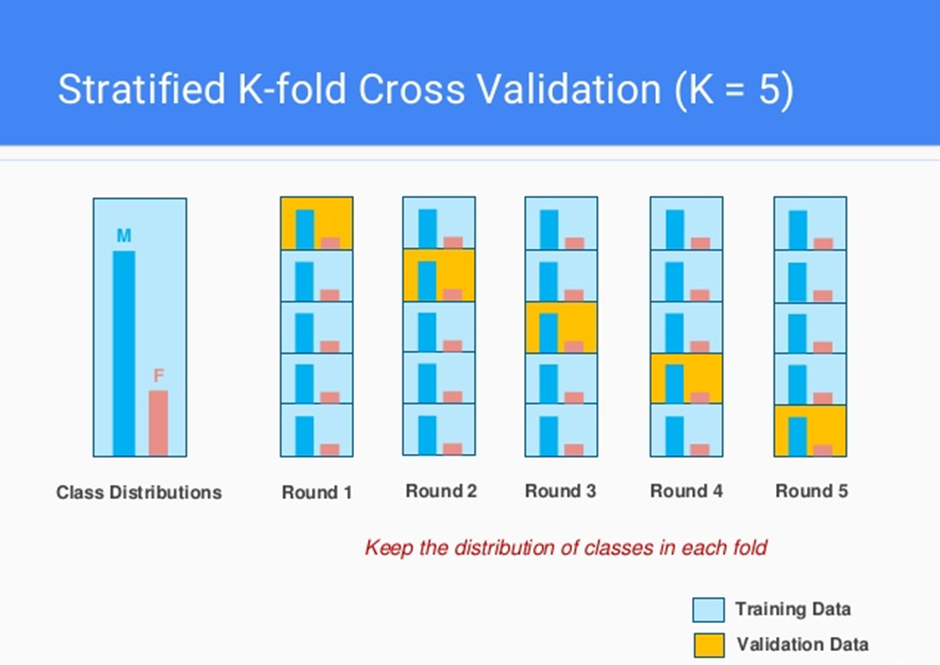

In [64]:
from sklearn.model_selection import StratifiedKFold
# Stratified k-Fold Cross Validation setup
skf = StratifiedKFold(n_splits=5)
gb_clf = GradientBoostingClassifier()

# Initialize lists to store the results of each fold for the training phase
y_true_train, y_pred_train = [], []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Fit the model on the fold training data
    gb_clf.fit(X_train_fold, y_train_fold)
    
    # Predict on the fold validation data
    y_pred_fold = gb_clf.predict(X_val_fold)
    
    # Append the true labels and predictions for the fold
    y_true_train.extend(y_val_fold)
    y_pred_train.extend(y_pred_fold)

# After cross-validation, fit the model on the entire training set
gb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_test = gb_clf.predict(X_test)

# Calculate and print the classification report for the test set evaluation
print("Classification Report for Test Set Evaluation\n")
print(classification_report(y_test, y_pred_test, target_names=unique_labels))

Classification Report for Test Set Evaluation

                    precision    recall  f1-score   support

     entertainment       0.57      0.50      0.53         8
         geography       0.56      0.45      0.50        11
            health       0.75      0.60      0.67        15
          politics       0.91      0.43      0.59        23
science/technology       0.46      0.76      0.57        41
            sports       0.89      0.47      0.62        17
            travel       0.72      0.69      0.71        26

          accuracy                           0.60       141
         macro avg       0.69      0.56      0.60       141
      weighted avg       0.68      0.60      0.61       141



### Sequence to Sequence Tasks

Sequence to Sequence tasks involve converting sequences from one domain to sequences in another domain, such as translation, summarization, and question answering (QA).

- **Summarization**: Shortening a text document to create a summary with all the key information.
- **Translation**: Translating text from one language to another.
- **Question Answering (QA)**: Generating answers to questions based on a given text.

**Evaluation**: BLEU score for translation, ROUGE score for summarization, and accuracy or F1 for QA.

**Sample Output**: Translation of "Hello, world!" into Spanish might be "¡Hola, mundo!"

#### Machine Translation 
Machine Translation (MT) is the process of automatically converting text from one language to another.Translation converts a sequence of text from one language to another. It is one of several tasks you can formulate as a sequence-to-sequence problem. It is a Kind of Many-to-Many Sequence Modelling.

![](../assets/machine_translation.gif)

[Reference Reading](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/)

In [65]:
from transformers import pipeline  # The pipeline function from the transformers library simplifies the process of running inference on various NLP tasks using pre-trained models.
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM  # These classes provide a generic way to instantiate both a tokenizer and a model from a pre-trained model checkpoint. They are used for tasks like translation and summarization.

# download and save model and tokenizer
# `Helsinki-NLP/opus-mt-en-hi` is a model specifically trained for translating English to Hindi.
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-hi") 
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-hi")

# input sentences
input_text = """Developing efficient algorithms for natural language processing tasks is crucial for 
advancing AI technologies."""
print(f"Input Text:\n{input_text}\n")
# convert sentences to tensors applying necessary padding and truncation to handle variable length inputs.
model_inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)

# translate from English to Hindi
# The `model.generate` function performs the actual translation by generating the output tokens.
# We then decode these tokens back into human-readable text.
translated_tokens = model.generate(**model_inputs, max_length=256)
translated_text = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)[0]

print(f"Translated Text:\n{translated_text}\n")


Input Text:
Developing efficient algorithms for natural language processing tasks is crucial for 
advancing AI technologies.

Translated Text:
स्वाभाविक भाषा प्रक्रिया के लिए कुशल एल्गोरिथ्म विकसित करना एआई तकनीकों को बढ़ाने के लिए अत्यावश्‍यक है ।



#### Summarization 
Summarization creates a shorter version of a document or an article that captures all the important information.It is a Kind of Many-to-Many Sequence Modelling. Along with translation, it is another example of a task that can be formulated as a sequence-to-sequence task. Summarization can be:

- **Extractive**: extract the most relevant information from a document.
- **Abstractive**: generate new text that captures the most relevant information.

In [66]:
# Summarization
summarizer = pipeline("summarization",model="sshleifer/distilbart-cnn-12-6")
input_document = """
From: bil@okcforum.osrhe.edu (Bill Conner)
Subject: Re: Not the Omni!
Nntp-Posting-Host: okcforum.osrhe.edu
Organization: Okcforum Unix Users Group
X-Newsreader: TIN [version 1.1 PL6]
Lines: 18

Charley Wingate (mangoe@cs.umd.edu) wrote:
: 
: >> Please enlighten me.  How is omnipotence contradictory?
: 
: >By definition, all that can occur in the universe is governed by the rules
: >of nature. Thus god cannot break them. Anything that god does must be allowed
: >in the rules somewhere. Therefore, omnipotence CANNOT exist! It contradicts
: >the rules of nature.
: 
: Obviously, an omnipotent god can change the rules.

When you say, "By definition", what exactly is being defined;
certainly not omnipotence. You seem to be saying that the "rules of
nature" are pre-existant somehow, that they not only define nature but
actually cause it. If that's what you mean I'd like to hear your
further thoughts on the question.
"""
print(f"Input Document:\n{input_document}\n")
summary = summarizer(input_document)
print("Summary:\n\n", summary[0]['summary_text'])


Input Document:

From: bil@okcforum.osrhe.edu (Bill Conner)
Subject: Re: Not the Omni!
Nntp-Posting-Host: okcforum.osrhe.edu
Organization: Okcforum Unix Users Group
X-Newsreader: TIN [version 1.1 PL6]
Lines: 18

Charley Wingate (mangoe@cs.umd.edu) wrote:
: 
: >> Please enlighten me.  How is omnipotence contradictory?
: 
: >By definition, all that can occur in the universe is governed by the rules
: >of nature. Thus god cannot break them. Anything that god does must be allowed
: >in the rules somewhere. Therefore, omnipotence CANNOT exist! It contradicts
: >the rules of nature.
: 
: Obviously, an omnipotent god can change the rules.

When you say, "By definition", what exactly is being defined;
certainly not omnipotence. You seem to be saying that the "rules of
nature" are pre-existant somehow, that they not only define nature but
actually cause it. If that's what you mean I'd like to hear your
further thoughts on the question.


Summary:

  Charley Wingate (mangoe@cs.umd.edu) wrote: "B

#### Translation and Summarization with Transformers

Both of these tasks are based on sequence to sequence (seq2seq) modelling, a concept in machine learning where the model is trained to convert sequences from one domain to sequences in another domain. This approach is particularly useful in natural language processing (NLP) for tasks such as machine translation (translating text from one language to another) and text summarization (creating a concise summary of a longer text).

#### High-Level Overview of Seq2Seq Models:

Seq2Seq models typically consist of two main components:

1. **Encoder**: This part of the model takes the input sequence (e.g., a sentence in English) and encodes it into a fixed-size context vector. The encoder processes the input sequence and compresses the information into this context vector, which is intended to capture the essence of the input information.

2. **Decoder**: Starting from the context vector produced by the encoder, the decoder generates the output sequence (e.g., the translated sentence in Hindi or a summary of the input text). The decoder learns to produce the output sequence step-by-step from the encoded information.

#### Transformers in Seq2Seq Modelling:

Transformers, introduced in the paper [Attention is All You Need](https://arxiv.org/abs/1706.03762) by Vaswani et al., have revolutionized seq2seq modelling. Unlike previous models that relied on recurrent neural networks (RNNs) or convolutional neural networks (CNNs), transformers use a mechanism called "attention" to weigh the influence of different parts of the input data differently. This allows transformers to process all parts of the input sequence simultaneously ("in parallel"), making them significantly faster and more efficient at capturing complex relationships in data.

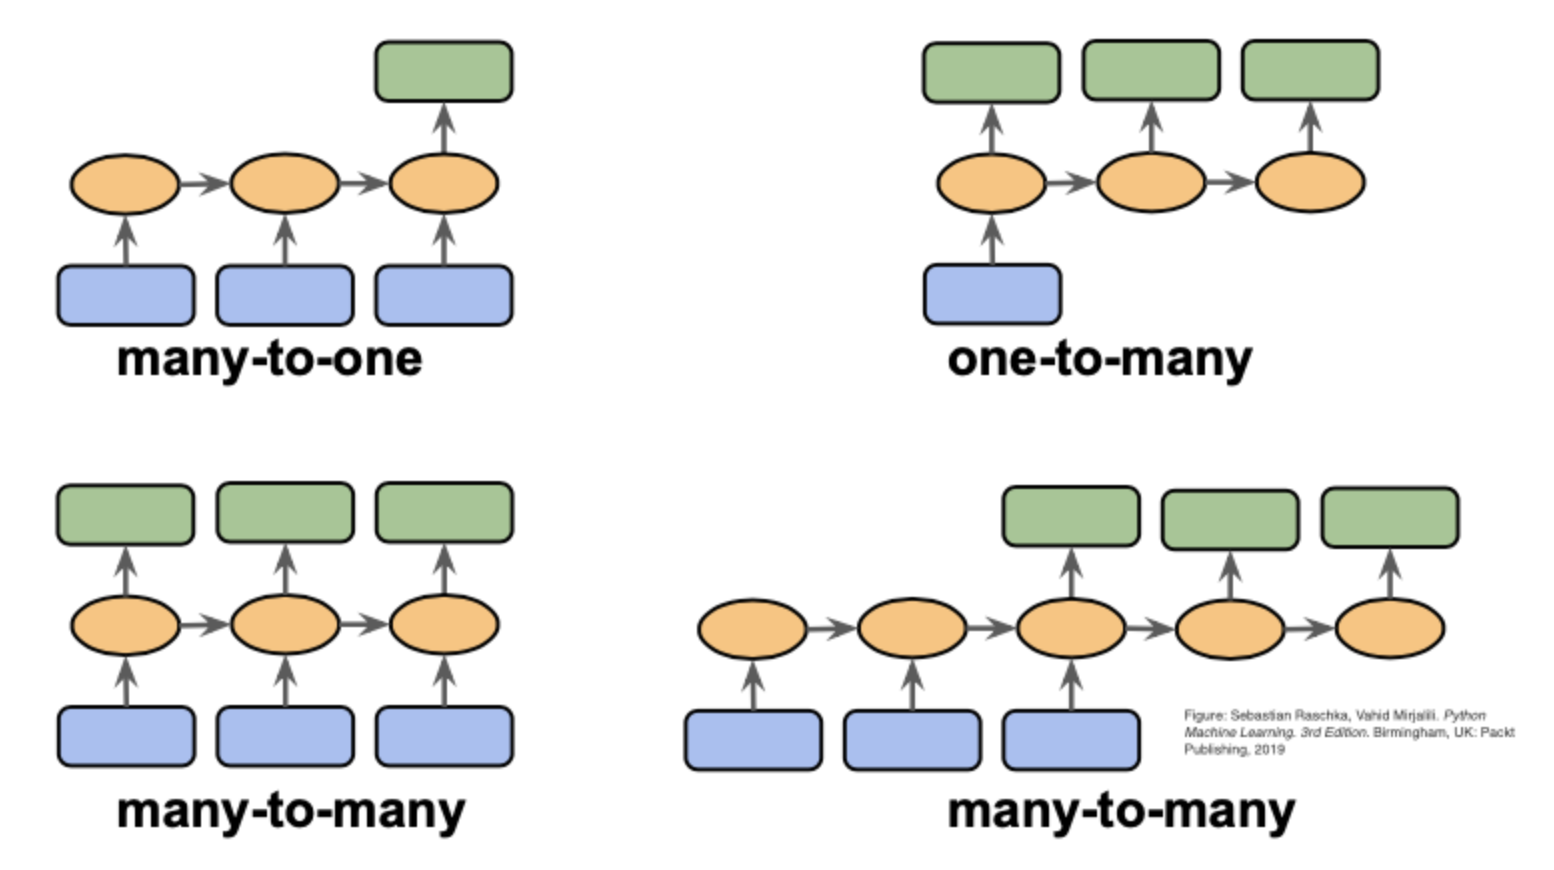